In [142]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import random

In [143]:
#Reading in data from file
reader = csv.reader(open('hw2prob1-data.txt','rt'), delimiter = ' ')
x = []
y = []
yp = []
for row in reader:
    if len(row) == 0:
        continue
    elif row[0] == 'x':
        continue
    else:
        x.append(float(row[0]))
        y.append(float(row[1]))
        yp.append(float(row[1]) + 5.0)

# i) Initial guess = (0.1, 0.1)

In [144]:
def neg_posterior(params,x,y,sigma,alpha):
    #This function is proportional to negative of the posterior function
    out = -1
    for k in range(0,len(x)):
        out *= (alpha*np.exp(-0.5*(y[k]-params[0]-params[1]*x[k])**2/sigma) + (1-alpha)*np.exp(-0.5*(yp[k]-params[0]-params[1]*x[k])**2/sigma))
    return out

In [145]:
initial = np.array([0.1,0.1])
best_params = opt.fmin(neg_posterior, initial, args = (x,y,1.0,0.7))
print(best_params)

Optimization terminated successfully.
         Current function value: -0.040107
         Iterations: 64
         Function evaluations: 124
[ 6.45687004  0.79098808]


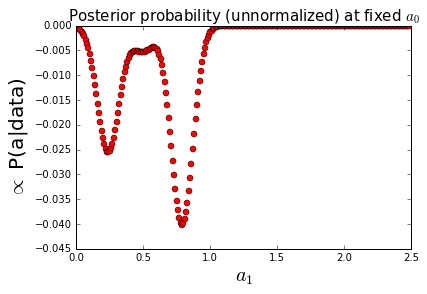

In [146]:
t = np.arange(0.0, 2.5, 0.01)
plt.plot(t, [neg_posterior([best_params[0],t1],x,y,1.0,0.7) for t1 in t], 'ro')
plt.title('Posterior probability (unnormalized) at fixed $a_0$', fontsize=15)
plt.ylabel('$\propto$ P(a|data)', fontsize=20)
plt.xlabel('$a_1$', fontsize=20)

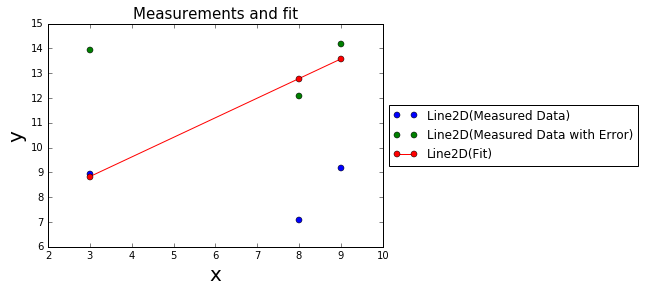

In [147]:
meas_data, = plt.plot(x,y,'bo', label='Measured Data')
meas_data2, = plt.plot(x,yp,'go', label='Measured Data with Error')
fit_line, = plt.plot(x,[best_params[0]+best_params[1]*xi for xi in x],'ro-', label='Fit')
plt.legend([meas_data, meas_data2, fit_line], loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis([2.0,10.0,6.0,15.0])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Measurements and fit', fontsize=15)

# ii) Iniital guess = results from least squares ignoring measurement error

In [148]:
def residuals(params,x,y):
    res = []
    for i in range(len(x)):
        res.append((y[i] - params[1]*x[i] - params[0])**2)
    return sum(res)

In [149]:
guess = np.array([0.1, 0.1])
aux_params = opt.fmin(residuals, guess, args = (x,y))
print(aux_params)

Optimization terminated successfully.
         Current function value: 2.513964
         Iterations: 69
         Function evaluations: 132
[ 9.03702713 -0.09599509]


In [150]:
initial2 = [aux_params[0], aux_params[1]]
best_params2 = opt.fmin(neg_posterior, initial2, args = (x,y,1.0,0.7))
print(best_params2)

Optimization terminated successfully.
         Current function value: -0.097653
         Iterations: 27
         Function evaluations: 52
[ 9.03666375 -0.09577411]


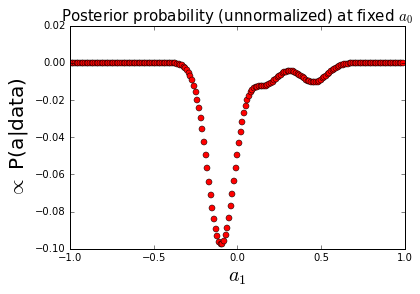

In [151]:
t = np.arange(-1.0, 1.0, 0.01)
plt.plot(t, [neg_posterior([best_params2[0],t1],x,y,1.0,0.7) for t1 in t], 'ro')
plt.title('Posterior probability (unnormalized) at fixed $a_0$', fontsize=15)
plt.ylabel('$\propto$ P(a|data)', fontsize=20)
plt.xlabel('$a_1$', fontsize=20)

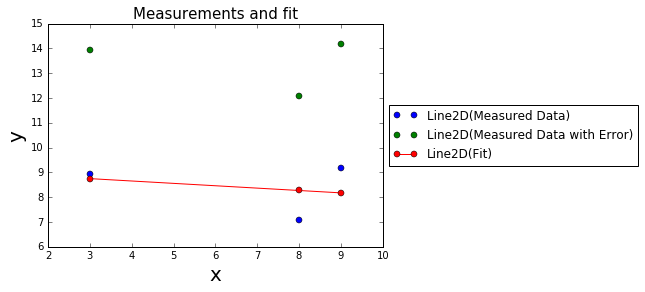

In [152]:
meas_data_2, = plt.plot(x,y,'bo', label='Measured Data')
meas_data2_2, = plt.plot(x,yp,'go', label='Measured Data with Error')
fit_line_2, = plt.plot(x,[best_params2[0]+best_params2[1]*xi for xi in x],'ro-', label='Fit')
plt.legend([meas_data_2, meas_data2_2, fit_line_2], loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis([2.0,10.0,6.0,15.0])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Measurements and fit', fontsize=15)

# iii) Other initial guesses for the fit parameters

In [153]:
initial3 = [20*(random.random()-0.5), 20*(random.random()-0.5)]
print(initial3)
best_params3 = opt.fmin(neg_posterior, initial3, args = (x,y,1.0,0.7))
print(best_params3)

[7.504909988523989, -9.44613569957798]
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 55
[ 7.50490999 -9.4461357 ]


In [154]:
initial3 = [20*(random.random()-0.5), 20*(random.random()-0.5)]
print(initial3)
best_params3 = opt.fmin(neg_posterior, initial3, args = (x,y,1.0,0.7))
print(best_params3)

[4.817977256148422, 6.527124266284121]
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 13
         Function evaluations: 51
[ 4.81797726  6.52712427]


In [155]:
initial3 = [20*(random.random()-0.5), 20*(random.random()-0.5)]
print(initial3)
best_params3 = opt.fmin(neg_posterior, initial3, args = (x,y,1.0,0.7))
print(best_params3)

[4.66562700813477, -1.2964480515835675]
Optimization terminated successfully.
         Current function value: -0.097653
         Iterations: 50
         Function evaluations: 94
[ 9.03666374 -0.0957698 ]


# Contour plot of fit parameters

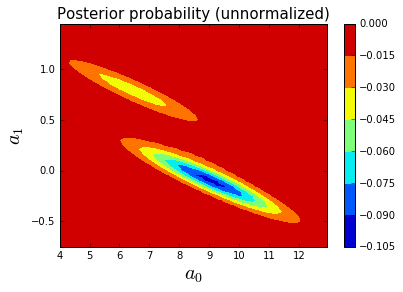

In [156]:
a0 = np.arange(4.0,13.0,0.05)
a1 = np.arange(-0.75,1.5,0.05)
z = np.array([[neg_posterior([i,j],x,y,1.0,0.7) for i in a0] for j in a1])
plt.contourf(a0,a1,z)
plt.colorbar()
plt.xlabel('$a_0$', fontsize=20)
plt.ylabel('$a_1$', fontsize=20)
plt.title('Posterior probability (unnormalized)', fontsize=15)